## Preparing A Dataset for Modeling  
### 04-Apr-2019 Lou Pendley  
### Version 1.0

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

In [104]:
# Let's read in the data set
DataFilePath = '../../../../Datafiles'
df = pd.read_csv(DataFilePath + '/imdb-data-from-2006-to-2016.zip', 
                 compression='zip', header=0, sep=',', quotechar='"')
df['first_genre'] = df['Genre'].apply(lambda x: x.split(',')[0])
df['first_actor'] = df['Actors'].apply(lambda x: x.split(',')[0])
df.rename(index=str, columns={"Revenue (Millions)": "Revenue"}, inplace=True)

In [105]:
sort_by = ['first_actor']

# We will want to group by Station ID: start, and end
df_sorted_actor=pd.DataFrame()
df_sorted_actor=df.sort_values(by=sort_by, ascending=False)
# print(df_sorted_actor)
df_sorted_actor.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue', 'Metascore',
       'first_genre', 'first_actor'],
      dtype='object')

In [106]:
df_sorted_genre = df.sort_values(by=['first_genre'])
# print("there are {} distinct genres.".format(len(df_sorted_genre['first_genre'].unique())))
# for name in df_sorted_genre['first_genre'].unique():
#     print("first genre is {}".format(name))

In [107]:
i = 1
top = 20
df_sorted_first_actor = df.sort_values(by=['first_actor'])
print("there are {} distinct first actors.".format(len(df_sorted_first_actor['first_actor'].unique())))
# print("Here are the top {} in alphabetical first name order.".format(top))
# for name in df_sorted_first_actor['first_actor'].unique()[0:top]:
#     print("first actor number {} is {}".format(i, name))
#     i += 1

there are 525 distinct first actors.


In [108]:
grouping_columns = ['first_actor']
sort_by_aggregate = ['count']

# # We will want to group by first actor
df_first_actor_grouped=df.groupby(grouping_columns )['first_actor'].agg(['count']) 
df_first_actor_grouped=df_first_actor_grouped.sort_values(by=sort_by_aggregate, ascending=False)
# print(df_first_actor_grouped)

In [109]:
grouping_columns = ['first_genre']
sort_by_aggregate = ['count']

# # We will want to group by first genre
df_first_genre_grouped=df.groupby(grouping_columns )['first_actor'].agg(['count']) 
df_first_genre_grouped=df_first_genre_grouped.sort_values(by=sort_by_aggregate, ascending=False)
print(df_first_genre_grouped)

             count
first_genre       
Action         293
Drama          195
Comedy         175
Adventure       75
Crime           71
Biography       64
Animation       49
Horror          46
Mystery         13
Thriller        10
Fantasy          4
Sci-Fi           3
Romance          2


## Let's do the Univariate analysis

1. How many variables do I have?  

|Variable|Type|Clean Data|To Use?|
|:----------|:-------|:-------|:-----|
|Rank|Continuous Ratio|Yes|No| 
|Title|Other|Yes|No|
|Genre|Categorical|Yes|Yes(first_genre)|
|Description|Other|Yes|No|
|Director|Categorical|Yes|Yes|
|Actors|Categorical|Yes|Yes(first_actor)|
|Year|Continuous: Ratio|Yes|No|
|Runtime(minutes)|Continuous: Ratio|Yes|No|
|Rating|Categorical|Yes|Yes|
|Votes|Continuous: Interval|Yes|Yes|
|Revenue|Continuous: Ratio|Yes|Yes|
|Metascore|Continuous: Ratio|Yes|Yes|


1. How many data points?
    1.  We have 1,000 movies in this dataset
1. Which variables are categorical, and which are continuous?
    1. See table 1 above.
1. Do any of my variables have a known probability distribution?
1. Do I have missing data?
    1. If so, how much?
1. How much variance is there in each of my variables?

Do some visualizations of the variables we are going to use.

In [110]:
cont_variable_list = ['Rating', 'Votes', 'Revenue', 'Metascore']
vars_to_use = ['Directory', 'first_actor', 'first_genre', 'Rating', 'Votes', 'Revenue', 'Metascore']

In [111]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
# printmd('**bold**')

variable=**Rating**, mean=6.72, std_dev=0.95

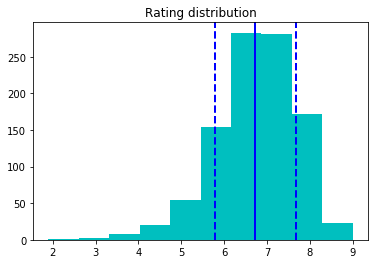

variable=**Votes**, mean=169808.26, std_dev=188762.65

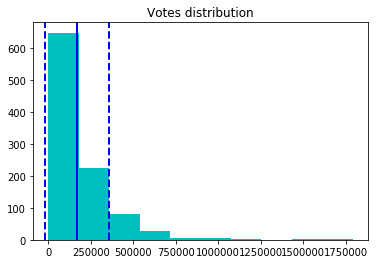

variable=**Revenue**, mean=82.96, std_dev=103.25

/Users/lou/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lou/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


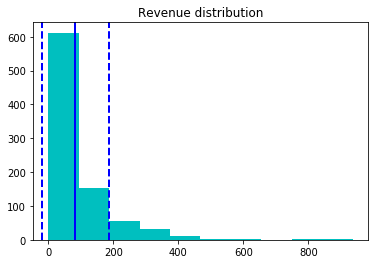

variable=**Metascore**, mean=58.99, std_dev=17.19

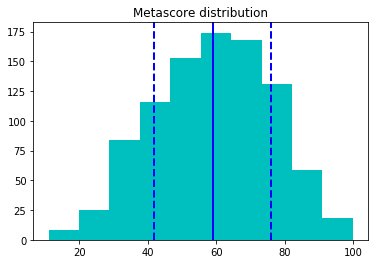

In [112]:
print("\n\n")

for var in cont_variable_list:
    printmd("variable=**{}**, mean={:0.2f}, std_dev={:0.2f}".format(var,df[var].mean(),df[var].std()))
    
    mean = df[var].mean()
    std = df[var].std()

    plt.title(var+' distribution', fontdict=None, loc='center', pad=None)
    #Plot a histogram for rand1.
    plt.hist(df[var], bins=10, color='c')

    # Add a vertical line at the mean.
    plt.axvline(mean, color='b', linestyle='solid', linewidth=2)

    # Add a vertical line at one standard deviation above the mean.
    plt.axvline(mean + std, color='b', linestyle='dashed', linewidth=2)

    # Add a vertical line at one standard deviation below the mean.
    plt.axvline(mean-std, color='b', linestyle='dashed', linewidth=2) 

    # Print the histogram.
    plt.show()
    print("\n\n")

## Let's do the Bivariate analysis

In [113]:
print("Let's do the Bivariate analysis!")
df.set_index(cont_variable_list);

Let's do the Bivariate analysis!


In [114]:
## Let's create a df for the bivariate analysis
df_bv_analysis = df.loc[(df['Director'] != 'xx') | 
                        (df['first_actor'] != 'xx') | 
                        (df['first_genre'] != 'xx') | 
                        (df['Rating'] != -1) | 
                        (df['Rating'] != -1) | 
                        (df['Votes'] != -1) | (df['Revenue'] != -1) | (df['Metascore'] != -1),
                        ['Director', 'first_actor', 'first_genre', 'Rating', 'Votes', 'Revenue', 'Metascore']]


In [115]:
df_bv_analysis.first_genre.unique()

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy'], dtype=object)

#### We need to scale the numeric values based on their mean and standard deviation, which normalizes them for comparison in the upcoming heat maps.

In [116]:
## Let's setup the analysis data frame
df_bv_analysis = df[['Director', 'first_actor', 'first_genre', 'Rating', 'Votes', 'Revenue', 'Metascore']]

# Let's scale the numeric variables to all the same sizing for comparison
# df_num = df_bv_analysis[['Director','first_actor', 'first_genre','Rating','Votes','Revenue','Metascore']].select_dtypes(include=[np.number]).dropna()
df_num = df_bv_analysis[['Director','first_actor', 'first_genre','Rating','Votes','Revenue','Metascore']].select_dtypes(include=[np.number]).dropna()
names = df_num.columns
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names);

/Users/lou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [117]:
df_jittered = df_scaled.loc[:,cont_variable_list].dropna()
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)), 
    columns=df_jittered.columns)

In [118]:
df_jittered = df_jittered.add(jitter)

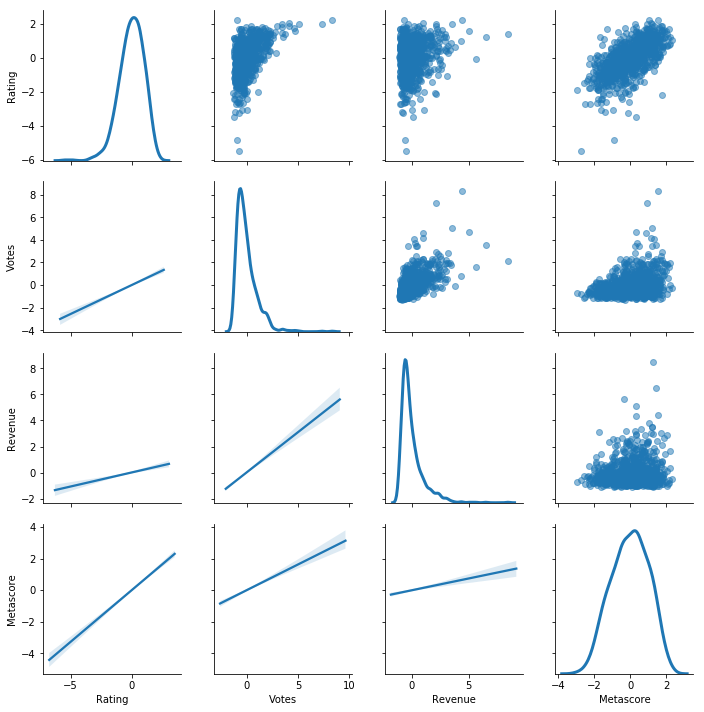

In [119]:
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot,lw=3)
plt.show()

In [120]:
# Make the correlation matrix
corrmat = df_scaled.corr()
print(corrmat)

             Rating     Votes   Revenue  Metascore
Rating     1.000000  0.517452  0.217106   0.672731
Votes      0.517452  1.000000  0.636833   0.332674
Revenue    0.217106  0.636833  1.000000   0.142397
Metascore  0.672731  0.332674  0.142397   1.000000


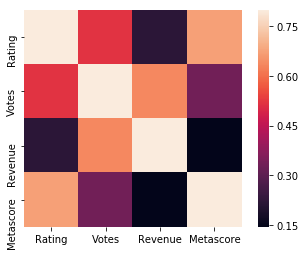

In [121]:
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [122]:
# Perform ttests on df_scaled between

In [123]:
df_long = df_bv_analysis.dropna()
df_long = pd.melt(df_long, id_vars=['first_genre'])

In [124]:
# df[('first_genre']

In [125]:
# this errored out.  Was trying to run cell #4 in 2.1.4 Exploring the Data
# g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5);
# g = g.map(sns.boxplot, "first_genre", "value")
# plt.show()

In [126]:
# We will conduct a t-test between Action and Horror movies for the numeric data types
for col in df_bv_analysis.loc[:, 'Rating' : 'Metascore'].columns:
    print(col)
    print(stats.ttest_ind(
        df_bv_analysis[df_bv_analysis['first_genre'] == 'Action'][col].dropna(),
        df_bv_analysis[df_bv_analysis['first_genre'] == 'Horror'][col].dropna()
    ))

Rating
Ttest_indResult(statistic=4.9798618724902255, pvalue=1.0180241314983175e-06)
Votes
Ttest_indResult(statistic=4.742369819171481, pvalue=3.1232388111917567e-06)
Revenue
Ttest_indResult(statistic=3.6586882394174607, pvalue=0.0002979790871158919)
Metascore
Ttest_indResult(statistic=-0.6498518453563706, pvalue=0.5162526940652793)


### Let's create 10 new features with this movie set data. 

1. Action movies grossing over \\$10 million \- label Action_10mill   
We want to find out why these success stories grossed starting at \$10 million
1. Ratings lower than 2, grossing over \\$5 million LowRatings_5mill  
How can movies with low ratings still gross \\$5 million or more?
1. High voted movies grossing less than \\$1 million HiVotesLowGross 
Are there movies that grossed little, yet had high numbers of votes?
1. Revenue over \\$300 million RevenuOver300mill  
Report the big grossing movies
1. Dollars per vote DollrsPerVote  
How much gross dollars represents one vote?
1. Metascores per dollar MetascoresPerDollar  
How much does 1 Metascore represent?
1. Ratings times Votes RatingsXVotes  
An interesting calculation that may yield suprising results
1. Revenue divided by ratings RevDivRatings  
Let's normalize Revenue by ratings - perhaps a new benchmark
1. Metascore times Rating  MetaTimesRating  
Yet another rating parameter - Metascore times Rating
1. Square root of votes VotesSQRoot  
A new twist - does the square root of the votes prove to be a viable parameter

In [127]:
# New Features
df_bv_analysis['Action_10mill'] = np.where((df_bv_analysis['first_genre'] == 'Action') & (df_bv_analysis['Revenue'] > 10.0), 1, 0)
df_bv_analysis['LowRatings_5mill'] = np.where((df_bv_analysis['Rating'] < 2.0) & (df_bv_analysis['Revenue'] > 5.0), 1, 0)
df_bv_analysis['HiVotesLowGross'] = np.where((df_bv_analysis['Votes'] > 400000) & (df_bv_analysis['Revenue'] < 1.0), 1, 0)
df_bv_analysis['RevenuOver300mill'] = np.where((df_bv_analysis['Revenue'] > 300.0), 1, 0)
df_bv_analysis['DollrsPerVote'] = df_bv_analysis['Revenue'] / df_bv_analysis['Votes']
df_bv_analysis['MetascoresPerDollar'] = df_bv_analysis['Metascore'] / df_bv_analysis['Revenue']
df_bv_analysis['RatingsXVotes'] = df_bv_analysis['Rating'] * df_bv_analysis['Votes']
df_bv_analysis['RevDivRatings'] = df_bv_analysis['Revenue'] / df_bv_analysis['Rating']
df_bv_analysis['MetaTimesRating'] = df_bv_analysis['Metascore'] * df_bv_analysis['Rating']
df_bv_analysis['VotesSQRoot'] = np.sqrt(df_bv_analysis.Votes)

/Users/lou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [128]:
df_bv_analysis.sample(20)

,Director,first_actor,first_genre,Rating,Votes,Revenue,Metascore,Action_10mill,LowRatings_5mill,HiVotesLowGross,RevenuOver300mill,DollrsPerVote,MetascoresPerDollar,RatingsXVotes,RevDivRatings,MetaTimesRating,VotesSQRoot
87,James Cameron,Sam Worthington,Action,7.8,935408,760.51,83.0,1,0,0,1,0.000813,0.109137,7296182.4,97.501282,647.4,967.164929
133,Damien Chazelle,Miles Teller,Drama,8.5,477276,13.09,88.0,0,0,0,0,0.000027,6.722689,4056846.0,1.540000,748.0,690.851648
889,Jonathan Levine,Joseph Gordon-Levitt,Comedy,7.7,281625,34.96,72.0,0,0,0,0,0.000124,2.059497,2168512.5,4.540260,554.4,530.683522
105,David Mackenzie,Chris Pine,Crime,7.7,115546,26.86,88.0,0,0,0,0,0.000232,3.276247,889704.2,3.488312,677.6,339.920579
398,Terry Jones,Simon Pegg,Comedy,6.0,26587,NaN,31.0,0,0,0,0,NaN,NaN,159522.0,NaN,186.0,163.055205
558,Ron Howard,Chris Hemsworth,Action,6.9,90372,24.99,47.0,1,0,0,0,0.000277,1.880752,623566.8,3.621739,324.3,300.619361
270,Sam Mendes,Daniel Craig,Action,7.8,547386,304.36,81.0,1,0,0,1,0.000556,0.266132,4269610.8,39.020513,631.8,739.855391
93,Todd Phillips,Jonah Hill,Comedy,7.1,106463,43.02,57.0,0,0,0,0,0.000404,1.324965,755887.3,6.059155,404.7,326.286684
343,David Lowery,Bryce Dallas Howard,Adventure,6.8,36322,76.20,71.0,0,0,0,0,0.002098,0.931759,246989.6,11.205882,482.8,190.583315
421,David Ross,Lauren Birkell,Drama,5.7,8914,0.04,35.0,0,0,0,0,0.000004,875.000000,50809.8,0.007018,199.5,94.413982
